In [1]:
import pandas as pd
import numpy as np

num_topics = 26
df = pd.read_csv(f"~/Desktop/R_js/data/beta/pro{num_topics}_beta.csv")
df['log_beta'] = np.absolute(np.log(df.beta))
display(df.head())
print(df.shape)
# print(df.log_beta.isna().sum())

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


,topic,term,beta,log_beta
0,1,1_hour_break,3.672673e-208,477.636779
1,2,1_hour_break,1.351000e-189,434.887738
2,3,1_hour_break,8.675901e-213,488.290076
3,4,1_hour_break,4.690151e-197,452.063799
4,5,1_hour_break,6.897081e-192,440.165240


(172666, 4)


In [2]:
t1 = df[df.topic == 1]
display(t1.head())
print(t1.shape)

,topic,term,beta,log_beta
0,1,1_hour_break,3.672673e-208,477.636779
26,1,1_hour_lunch,6.593800e-160,366.527485
52,1,1_hr_lunch,9.437665e-171,391.497342
78,1,10_discount_card,1.194604e-145,333.697024
104,1,10_discount_flexibl,6.252874e-113,258.359074


(6641, 4)


In [3]:
df.groupby("topic")["beta"].sum().reset_index().head()

,topic,beta
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0


# Convert beta list to doc term frequency matrix

In [4]:
topics_beta = df.groupby("topic")["beta"].apply(list).reset_index(name="beta_list")
topics_beta.head()

,topic,beta_list
0,1,"[3.6726734674797033e-208, 6.593800499318295e-1..."
1,2,"[1.3509999299440654e-189, 4.077189850981268e-1..."
2,3,"[8.675900755757499e-213, 6.856420378244512e-18..."
3,4,"[4.690151178255452e-197, 1.5924070774999598e-1..."
4,5,"[6.8970811363843954e-192, 4.1065054750368175e-..."


In [5]:
beta_list = []
for t in range(1, num_topics+1): 
    beta_list.append(topics_beta[topics_beta.topic == t].beta_list.tolist()[0])
# print(beta_list)

col_name = t1.term.tolist()
doc_term = pd.DataFrame(beta_list, 
                       columns = col_name, 
                       index = range(1, num_topics+1))
display(doc_term.head())
print(doc_term.shape)

,1_hour_break,1_hour_lunch,1_hr_lunch,10_discount_card,10_discount_flexibl,10_discount_groceri,10_discount_kroger,10_discount_purchas,10_discount_store,10_employe_discount,...,yearli_rais,yoga,york,youll,your,youth,youv,zero,zone,zulu
1,3.672673e-208,6.593800e-160,9.437665e-171,1.194604e-145,6.252874e-113,5.848682e-167,3.403791e-184,7.520880e-154,7.965274e-155,2.399225e-148,...,2.781135e-122,2.791742e-103,9.995520e-60,3.596024e-88,1.821899e-29,1.899316e-94,6.932321e-67,3.783386e-106,9.326796e-98,5.838038e-04
2,1.351000e-189,4.077190e-131,3.063441e-141,4.363211e-126,2.938245e-111,1.750483e-171,1.640222e-192,2.956453e-141,1.006664e-131,4.835422e-145,...,5.114668e-104,3.950025e-56,1.180510e-145,1.410993e-33,8.293473e-41,9.247746e-75,1.846135e-95,9.028957e-79,6.759382e-103,2.151417e-191
3,8.675901e-213,6.856420e-180,3.412929e-171,7.233450e-142,3.319812e-133,8.734431e-169,3.148526e-173,6.103262e-194,1.901603e-160,9.056477e-153,...,1.659886e-130,1.246223e-124,2.370587e-127,2.030403e-69,4.405663e-44,1.831123e-55,1.320408e-85,5.045198e-58,4.653963e-62,9.322121e-197
4,4.690151e-197,1.592407e-158,1.462683e-160,1.379922e-113,3.885062e-116,2.313513e-133,4.048921e-144,4.583188e-173,1.969981e-128,1.668338e-124,...,1.740477e-130,9.631226e-88,9.554153e-63,3.304284e-55,5.589515e-19,1.700708e-26,1.378827e-64,3.984600e-86,7.779641e-29,1.033656e-191
5,6.897081e-192,4.106505e-165,6.645470e-153,2.006964e-127,2.074660e-106,3.407459e-150,2.679560e-160,1.061269e-172,6.585208e-119,1.349982e-140,...,2.204372e-143,1.164587e-113,1.086622e-119,7.164709e-67,6.416722e-27,1.027824e-87,6.542743e-34,9.376958e-106,6.061102e-79,2.450311e-198


(26, 6641)


# Compute Cosine Similarity

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
import math

cos_sim = cosine_similarity(doc_term, doc_term)
# cos_sim = [['{:f}'.format(item) for item in item_array] for item_array in cos_sim]
# cos_sim = np.array(cos_sim)
np.set_printoptions(suppress=True)
cos_sim = np.round(cos_sim, 2)
print(cos_sim)

[[1.   0.32 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.13 0.   0.
  0.   0.   0.   0.   0.   0.35 0.   0.   0.   0.   0.14 0.58]
 [0.32 1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.12 0.   0.
  0.   0.   0.   0.   0.   0.32 0.   0.   0.   0.   0.13 0.54]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.24 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.
  0.   0.07 0.   0.16 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.

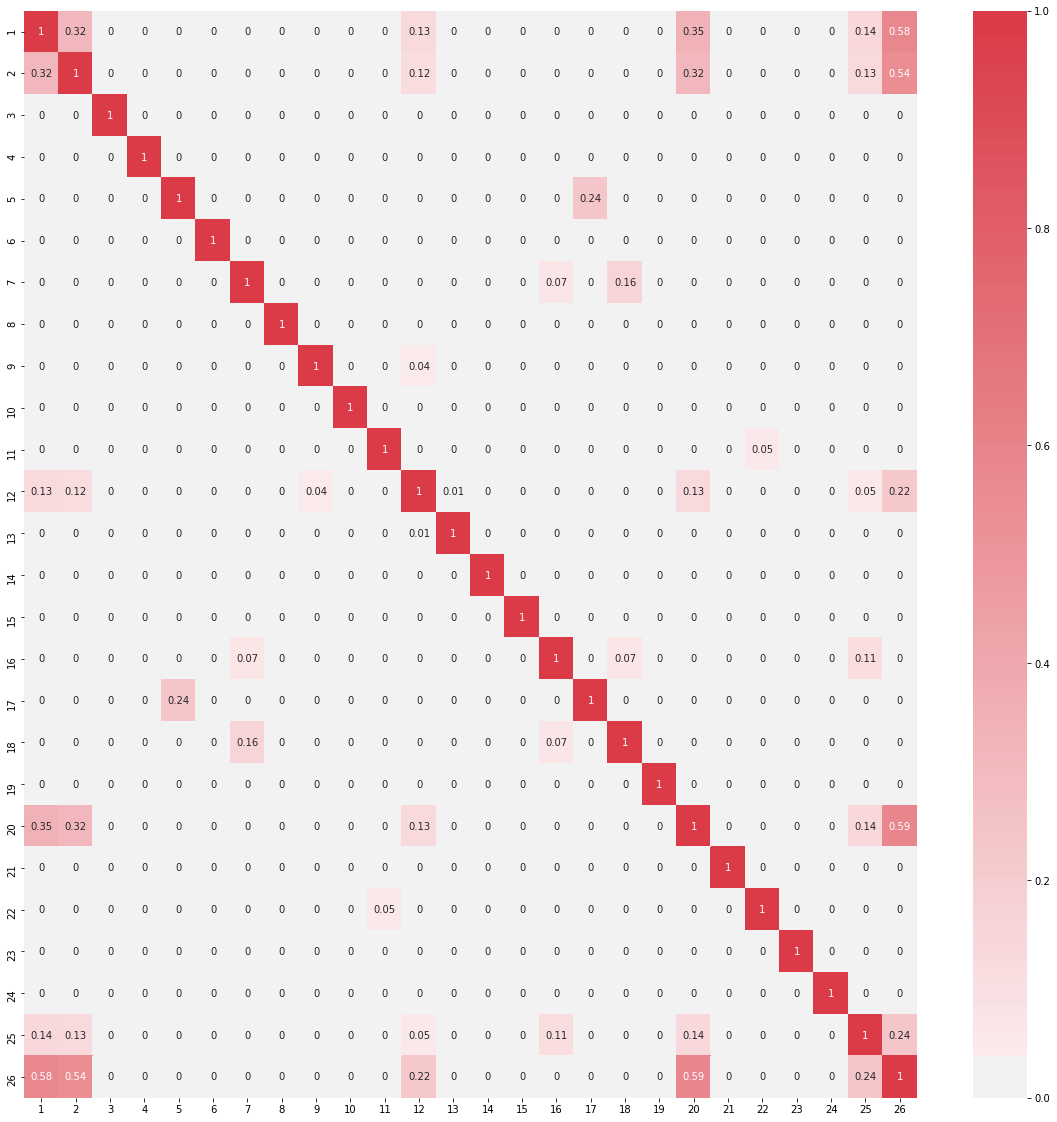

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

df_cos_sim = pd.DataFrame(cos_sim, 
                         columns= range(1, num_topics+1), 
                         index = range(1, num_topics+1))

# df_cos_sim.head(8)
plt.figure(figsize=(20, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(df_cos_sim, cmap=cmap, annot=True, center=0.0)
plt.show()

In [9]:
for i, row in df_cos_sim.iterrows():
    s = f"Topic {i}: "
    for j in range(1, num_topics+1):
        val = row[j]
        if(val>0):
            s = s + f"{j}<{val}>" + " "
    print(s)
            
    

Topic 1: 1<1.0> 2<0.32> 12<0.13> 20<0.35> 25<0.14> 26<0.58> 
Topic 2: 1<0.32> 2<1.0> 12<0.12> 20<0.32> 25<0.13> 26<0.54> 
Topic 3: 3<1.0> 
Topic 4: 4<1.0> 
Topic 5: 5<1.0> 17<0.24> 
Topic 6: 6<1.0> 
Topic 7: 7<1.0> 16<0.07> 18<0.16> 
Topic 8: 8<1.0> 
Topic 9: 9<1.0> 12<0.04> 
Topic 10: 10<1.0> 
Topic 11: 11<1.0> 22<0.05> 
Topic 12: 1<0.13> 2<0.12> 9<0.04> 12<1.0> 13<0.01> 20<0.13> 25<0.05> 26<0.22> 
Topic 13: 12<0.01> 13<1.0> 
Topic 14: 14<1.0> 
Topic 15: 15<1.0> 
Topic 16: 7<0.07> 16<1.0> 18<0.07> 25<0.11> 
Topic 17: 5<0.24> 17<1.0> 
Topic 18: 7<0.16> 16<0.07> 18<1.0> 
Topic 19: 19<1.0> 
Topic 20: 1<0.35> 2<0.32> 12<0.13> 20<1.0> 25<0.14> 26<0.59> 
Topic 21: 21<1.0> 
Topic 22: 11<0.05> 22<1.0> 
Topic 23: 23<1.0> 
Topic 24: 24<1.0> 
Topic 25: 1<0.14> 2<0.13> 12<0.05> 16<0.11> 20<0.14> 25<1.0> 26<0.24> 
Topic 26: 1<0.58> 2<0.54> 12<0.22> 20<0.59> 25<0.24> 26<1.0> 
